In [25]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

all_o3_df = pd.read_csv("./all_years_o3.csv")
#turn date column elements into datetime objects
all_o3_df["Date"] = pd.to_datetime(all_o3_df["Date"])
all_o3_df = all_o3_df.set_index("Date")

all_pm25_df = pd.read_csv("./all_years_pm25.csv")
#turn date column elements into datetime objects
all_pm25_df["Date"] = pd.to_datetime(all_pm25_df["Date"])
all_pm25_df = all_pm25_df.set_index("Date")
all_pm25_df.head()

,Country,City,Specie,count,min (ug/m3),max (ug/m3),median (ug/m3)
Date,,,,,,,
2017-01-01,IN,New Delhi,pm25,24,54.9,282.7,177.7
2017-01-01,CN,Shanghai,pm25,215,12.0,63.2,34.4
2017-01-01,US,Jacksonville,pm25,115,3.1,113.6,8.1
2017-01-01,US,Los Angeles,pm25,69,3.3,109.7,15.9
2017-01-01,US,Manhattan,pm25,96,4.3,23.0,12.1


In [26]:
#select date range to measure PM2.5 for full shutdown - include all years
#messy right now - turn into a function!

#use Jacksonville as an example
earliest_year = min(all_pm25_df.index.year)
latest_year = max(all_pm25_df.index.year)
shutdown_start_date = (1, 26)#"1/23"
shutdown_end_date = (4, 8)#"4/8"
mask = ((pd.Series(map(lambda x: x.month <= shutdown_start_date[0], all_pm25_df.index.date), index=all_pm25_df.index)) &
                                            ((pd.Series(map(lambda x: x.day < shutdown_start_date[1], all_pm25_df.index.date), index=all_pm25_df.index))))
#first get dates after the start date for all years
shutdown_time_period_pm_df = all_pm25_df.loc[~mask, :]

#remove the later months
shutdown_time_period_pm_df = shutdown_time_period_pm_df.loc[shutdown_time_period_pm_df.index.month<=shutdown_end_date[0]]

#now get dates before the end date
mask2 = ((pd.Series(map(lambda x: x.month == shutdown_end_date[0], shutdown_time_period_pm_df.index.date), index=shutdown_time_period_pm_df.index)) &
                                            ((pd.Series(map(lambda x: x.day >= shutdown_end_date[1], shutdown_time_period_pm_df.index.date), index=shutdown_time_period_pm_df.index))))

shutdown_time_period_pm_df = shutdown_time_period_pm_df.loc[~mask2, :]

shutdown_time_period_pm_df = shutdown_time_period_pm_df.loc[shutdown_time_period_pm_df["City"] == "Beijing"]
print(shutdown_time_period_pm_df.head())
shutdown_time_period_pm_df.tail(10)

           Country     City Specie  count  min (ug/m3)  max (ug/m3)  \
Date                                                                  
2017-01-26      CN  Beijing   pm25    296          3.1   400.400000   
2017-01-27      CN  Beijing   pm25    385          3.1   488.200000   
2017-01-28      CN  Beijing   pm25    448          3.1   942.509719   
2017-01-29      CN  Beijing   pm25    450          3.1   320.100000   
2017-01-30      CN  Beijing   pm25    396          3.1   127.100000   

            median (ug/m3)  
Date                        
2017-01-26           248.3  
2017-01-27            40.7  
2017-01-28           282.7  
2017-01-29            12.0  
2017-01-30            11.0  


,Country,City,Specie,count,min (ug/m3),max (ug/m3),median (ug/m3)
Date,,,,,,,
2020-03-29,CN,Beijing,pm25,443,13.0,92.2,39.9
2020-03-30,CN,Beijing,pm25,472,18.7,107.7,67.1
2020-03-31,CN,Beijing,pm25,459,15.9,105.8,61.3
2020-04-01,CN,Beijing,pm25,422,1.2,57.4,5.0
2020-04-02,CN,Beijing,pm25,436,1.2,80.6,16.8
2020-04-03,CN,Beijing,pm25,443,1.2,46.8,12.0
2020-04-04,CN,Beijing,pm25,452,2.1,69.0,21.1
2020-04-05,CN,Beijing,pm25,451,13.0,76.8,26.8
2020-04-06,CN,Beijing,pm25,453,23.9,125.2,67.1


In [27]:
#inputs for the function are the complete dataframe for one particulate (df), the city name (city), an integer tuple in the 
#form of (month, day) for the shutdown date (shutdown_date, for example (1, 23) for 1/23) - NOTE that this is the 
#date where the strictest lockdown regulations start for that city, and an integer tuple in the 
#form of (month, day) for the reopen date (reopen_date, for example (4, 8) for 4/8) - NOTE that this is the date when the city 
#begins to reopen from the strictest lockdown regulations
#
#returns a dataframe with the correct shutdown date ranges for all years in the data set
def shutdownData(df, city, shutdown_date, reopen_date):

    mask = ((pd.Series(map(lambda x: x.month <= shutdown_date[0], df.index.date), index=df.index)) &
                                                ((pd.Series(map(lambda x: x.day < shutdown_date[1], df.index.date), index=df.index))))
    #first get dates after the start date for all years
    shutdown_time_period_df = df.loc[~mask, :]

    #remove the later months
    shutdown_time_period_df = shutdown_time_period_df.loc[shutdown_time_period_df.index.month<=reopen_date[0]]

    #now get dates before the end date
    mask2 = ((pd.Series(map(lambda x: x.month == reopen_date[0], shutdown_time_period_df.index.date), index=shutdown_time_period_df.index)) &
                                                ((pd.Series(map(lambda x: x.day >= reopen_date[1], shutdown_time_period_df.index.date), index=shutdown_time_period_df.index))))

    shutdown_time_period_df = shutdown_time_period_df.loc[~mask2, :]

    shutdown_time_period_df = shutdown_time_period_df.loc[shutdown_time_period_df["City"] == city]
    
    return shutdown_time_period_df

test_df = shutdownData(all_pm25_df, "Beijing", (1, 26), (4, 8))

print("The 'shutdownData' function is working correctly:", test_df.equals(shutdown_time_period_pm_df))

The 'shutdownData' function is working correctly: True


In [37]:
#so to get the ozone information for Wuhan between the shutdown date of 1/23 and the reopening date of 4/8, we 
#need to call the function as follows:
Beijing_o3_shutdown_df = shutdownData(all_o3_df, "Beijing", (1, 26), (4, 8))
Beijing_o3_shutdown_df

,Country,City,Specie,count,min (ppb),max (ppb),median (ppb)
Date,,,,,,,
2017-01-26,CN,Beijing,o3,125,1.0,32.0,2.0
2017-01-27,CN,Beijing,o3,312,1.0,49.0,21.0
2017-01-28,CN,Beijing,o3,395,1.0,55.0,3.0
2017-01-29,CN,Beijing,o3,410,1.0,67.0,27.0
2017-01-30,CN,Beijing,o3,391,11.0,56.0,25.0
...,...,...,...,...,...,...,...
2020-04-03,CN,Beijing,o3,440,0.0,46.0,25.0
2020-04-04,CN,Beijing,o3,454,2.0,55.0,33.0
2020-04-05,CN,Beijing,o3,453,0.0,50.0,25.0


In [29]:
#get average of medians by year
bar_plot_info = shutdown_time_period_pm_df.groupby(shutdown_time_period_pm_df.index.year).mean()
bar_plot_info

,count,min (ug/m3),max (ug/m3),median (ug/m3)
Date,,,,
2017,417.069444,11.645833,221.731548,71.572222
2018,434.180556,20.481944,185.057690,64.626389
2019,452.319444,12.765278,194.259507,49.401389
2020,449.150685,17.798630,137.273493,51.790411


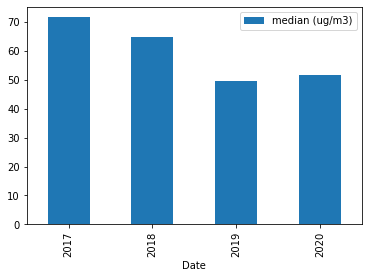

In [30]:
bar_plot_info.plot(kind="bar", y="median (ug/m3)")
plt.savefig("./Beijing_pm25med.png")

In [31]:
#combine three previous years into an average median value
prior_years_df = bar_plot_info.loc[bar_plot_info.index<2020]
prior_averages = prior_years_df.mean()
prior_averages

count             434.523148
min (ug/m3)        14.964352
max (ug/m3)       200.349581
median (ug/m3)     61.866667
dtype: float64

             average median during shutdown dates (ug/m3)
Prior Years                                           NaN
2020                                            -0.162871


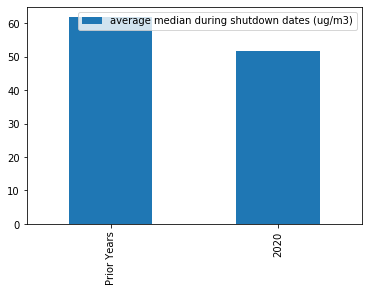

In [35]:
summary_bar_plot = pd.DataFrame({"average median during shutdown dates (ug/m3)":[prior_averages["median (ug/m3)"], 
                                                                                 bar_plot_info["median (ug/m3)"][2020]]}, 
                                index=["Prior Years", "2020"])

summary_bar_plot.plot(kind="bar")
print(summary_bar_plot.pct_change())
plt.savefig("./Beijing_pm25combined.png")

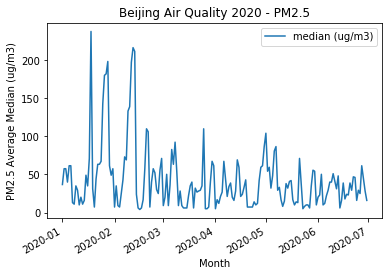

In [42]:
line_plot, line_axes = plt.subplots()
Beijing_2020_pm25_df = all_pm25_df.loc[(all_pm25_df.index.year == 2020) & (all_pm25_df["City"] == "Beijing")]
Beijing_line_axes = Beijing_2020_pm25_df.plot(kind="line", y="median (ug/m3)", ax=line_axes)
#set titles, axes labels
Beijing_line_axes.set_title("Beijing Air Quality 2020 - PM2.5")
Beijing_line_axes.set_ylabel("PM2.5 Average Median (ug/m3)")
Beijing_line_axes.set_xlabel("Month")
Beijing_line_axes.get_figure().savefig("./Beijing_2020_line_plot.png")

In [44]:
Beijing_2020_shutdown = Beijing_2020_pm25_df["1/26/20":"4/8/20"]
shutdown_axes = Beijing_2020_shutdown.plot(y="median (ug/m3)", style="r", ax=line_axes)
shutdown_axes.legend(["median (ug/m3)", "median (ug/m3) during shutdown"])
line_plot
Beijing_line_axes.get_figure().savefig("./Beijing_2020_line_plot.png")

In [38]:
#look at o3 values for wuhan for the same time period by year
Beijing_avg_o3_df = Beijing_o3_shutdown_df.groupby(Beijing_o3_shutdown_df.index.year).mean()
Beijing_avg_o3_df

,count,min (ppb),max (ppb),median (ppb)
Date,,,,
2017,365.430556,1.694444,57.458333,19.083333
2018,429.527778,1.444444,48.583333,21.194444
2019,434.013889,0.777778,44.805556,20.444444
2020,442.013699,1.547945,44.958904,22.315068


In [39]:
prior_years_o3_df = Beijing_avg_o3_df.loc[Beijing_avg_o3_df.index<2020]
prior_o3_averages = prior_years_o3_df.mean()
prior_o3_averages

count           409.657407
min (ppb)         1.305556
max (ppb)        50.282407
median (ppb)     20.240741
dtype: float64

,average median during shutdown dates (ppb)
Prior Years,NaN
2020,0.102483


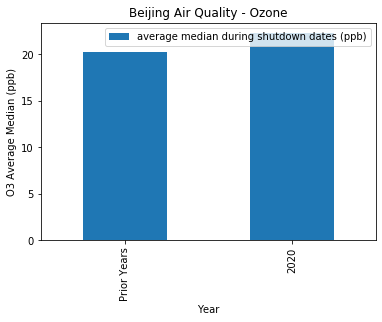

In [40]:
summary_bar_plot = pd.DataFrame({"average median during shutdown dates (ppb)":[prior_o3_averages["median (ppb)"], 
                                                                                 Beijing_avg_o3_df["median (ppb)"][2020]]}, 
                                index=["Prior Years", "2020"])

o3_axes = summary_bar_plot.plot(kind="bar")

#set titles, axes labels
o3_axes.set_title("Beijing Air Quality - Ozone")
o3_axes.set_ylabel("O3 Average Median (ppb)")
o3_axes.set_xlabel("Year")

o3_axes.get_figure().savefig("./Beijing_3yearmedianchange_o3.png")

summary_bar_plot.pct_change()